In [46]:
i = 0
for road_list in data['affected_roads']:
    road_list = str(road_list)
    print("Iteração :: ", i)
    print("Road List", road_list)
    if road_list != ",":
        roads = road_list.split(",")
        print(roads)
        dic = {}
        
        for road in roads:
            if road not in dic and road != "":
                print(road)
                dic[road] = 0
        #data2['affected_roads'][i] = dic.keys()
        print(dic.keys())
    i = i + 1

Iteração ::  0
Road List ,
Iteração ::  1
Road List N101,
['N101', '']
N101
dict_keys(['N101'])
Iteração ::  2
Road List ,
Iteração ::  3
Road List N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101
['N101', 'R206', 'N105', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101']
N101
R206
N105
dict_keys(['N101', 'R206', 'N105'])
Iteração ::  4
Road List N101,N101,N101,N101,N101,
['N101', 'N101', 'N101', 'N101', 'N101', '']
N101
dict_keys(['N101'])
Iteração ::  5
Road List N101,N101,N101,N101,N101,N101,N101,N101
['N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101']
N101
dict_keys(['N101'])
Iteração ::  6
Road List N101,N101,N101,N101,N101
['N101', 'N101', 'N101', 'N101', 'N101']
N101
dict_keys(['N101'])
Iteração ::  7
Road List N101,N101,N101,N101,N101,
['N101', 'N101', 'N101', 'N101', 'N101', '']
N101
dict_keys(['N101'])
Iteração ::  8
Road List N101,N101,N101,N101,N101,N101,N101,N101,N101,
['N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101', 'N101', 

<AxesSubplot:>

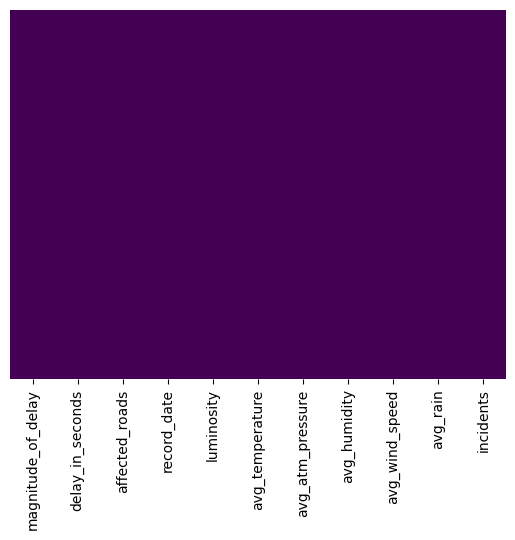

In [53]:
data3 = data2.dropna()
sns.heatmap(data3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como os valores dos incidentes, a nossa label, são categóricos, estes não poderão ser submetidos à maioria dos modelos de ML disponíveis. Assim, teremos de convertê-los para valores numéricos

In [41]:
replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

data4 = data3.replace(replace_map)
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3


Como podemos ver, agora o tipo do feature Incidents é numérico

In [43]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  4915 non-null   object 
 1   delay_in_seconds    4915 non-null   int64  
 2   affected_roads      4915 non-null   object 
 3   record_date         4915 non-null   object 
 4   luminosity          4915 non-null   object 
 5   avg_temperature     4915 non-null   float64
 6   avg_atm_pressure    4915 non-null   float64
 7   avg_humidity        4915 non-null   float64
 8   avg_wind_speed      4915 non-null   float64
 9   avg_rain            4915 non-null   object 
 10  incidents           4915 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 460.8+ KB


Agora vamos tratar das datas

In [54]:
data4['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [55]:
data4['record_date'] = pd.to_datetime(data4['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')
assert data4['record_date'].isnull().sum() == 0, 'missing record date'
data4['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [56]:
data4['record_date_year'] = data4['record_date'].dt.year
data4['record_date_month'] = data4['record_date'].dt.month
data4['record_date_day'] = data4['record_date'].dt.day
data4['record_date_hour'] = data4['record_date'].dt.hour
data4['record_date_minute'] = data4['record_date'].dt.minute
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0,2021,3,15,23,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0,2021,12,25,18,0
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1,2021,3,12,15,0
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4,2021,9,29,9,0
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3,2021,6,13,11,0


In [57]:
data4.nunique()

magnitude_of_delay       3
delay_in_seconds      1176
affected_roads         678
record_date           4915
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

Aqui podemos verificar que o ano dos incidentes, bem como o minuto, são features com um único valor, sendo então essa informação inútil.

In [78]:
data5 = data4.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
print(data5['magnitude_of_delay'].unique())
print(data5['luminosity'].unique())
print(data5['avg_rain'].unique())
#data5.info()

['UNDEFINED' 'MAJOR' 'MODERATE']
['DARK' 'LIGHT' 'LOW_LIGHT']
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']


A 'magnitude_of_delay' tem 3 valores possíveis: UNDEFINED, MAJOR e MODERATE <br>
A luminosidade tem 3 valores possíveis: LIGHT, LOW_LIGHT, DARK <br>
A 'avg_rain' tem 4 valores possíveis: Sem Chuva, chuva moderada, chuva fraca, chuva forte <br>
Assim, teremos de transformar estes valores em valores numéricos, fazendo label enconding


In [79]:
replace_map = { 'magnitude_of_delay' : {'UNDEFINED': 0, 'MODERATE': 1, 'MAJOR': 2}, 
                'luminosity': {'DARK': 0, 'LIGHT': 1, 'LOW_LIGHT': 2},
                'avg_rain': {'Sem Chuva': 0, 'chuva moderada': 1, 'chuva fraca': 2, 'chuva forte': 3}
              }
data6 = data5.replace(replace_map)
data6.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,0,12,25,18
2,0,69,1,14.0,1025.0,64.0,0.0,0,1,3,12,15
3,2,2297,1,15.0,1028.0,75.0,1.0,0,4,9,29,9
4,0,0,1,27.0,1020.0,52.0,1.0,0,3,6,13,11


Depois de feita toda a etapa de feature engineering, vamos agora construir um modelo de regressão logística.

In [85]:
df = data6

from sklearn.model_selection import train_test_split
X = df.drop('incidents', axis=1)
y = df['incidents']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

<AxesSubplot:xlabel='incidents', ylabel='count'>

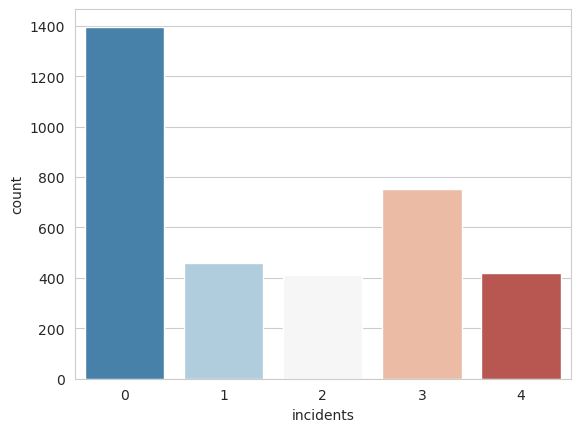

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='incidents', data=pd.DataFrame(y_train, columns=['incidents']), palette='RdBu_r')

<AxesSubplot:xlabel='incidents', ylabel='count'>

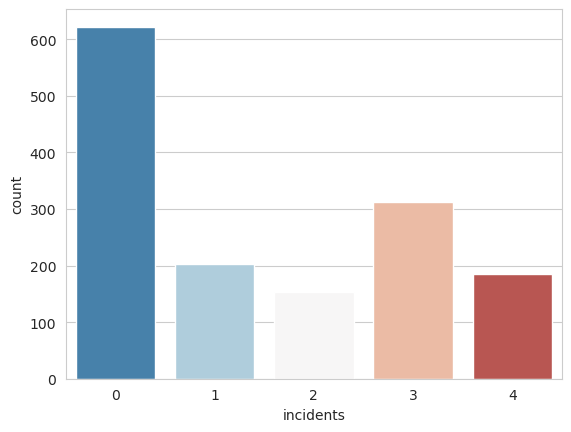

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='incidents', data=pd.DataFrame(y_test, columns=['incidents']), palette='RdBu_r')

É possível ver que a divisão dos dados foi bem feita, uma vez que a distribuição dos dados se mantém nos dados de teste como estava nos dados de treino.

In [101]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression(random_state=2022, solver='liblinear', multi_class='ovr', max_iter=1000)
logmodel1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=2022,
                   solver='liblinear')

In [102]:
predictions = logmodel1.predict(X_test)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.84      0.70       622
           1       0.67      0.26      0.37       203
           2       0.07      0.02      0.03       153
           3       0.22      0.20      0.21       312
           4       0.73      0.79      0.76       185

    accuracy                           0.53      1475
   macro avg       0.46      0.42      0.41      1475
weighted avg       0.49      0.53      0.49      1475



In [106]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2022)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [108]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [110]:
predictions_dt = clf.predict(X_test)
predictions

array([3, 3, 1, ..., 1, 4, 0])

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_dt)

0.9003389830508475